# MACHINE LEARNING
# DUMMIES
CONVERTING CATEGORICAL VARIABLES INTO NUMERIC TO IMPROVE THE PREDICTION

## PREDICTING CAR PRICES USING MULTIPLE VARIABLES

In [2]:
import pandas as pd 
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\Samhith\OneDrive\Documents\studies\carprices.csv")

In [4]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


<Axes: xlabel='Sell Price($)', ylabel='Mileage'>

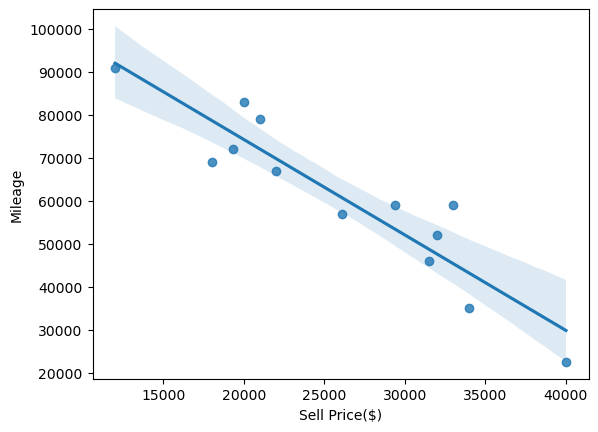

In [7]:
sns.regplot(x="Sell Price($)",y="Mileage",data=df)

In [11]:
#getting dummies for the car model
dummies=pd.get_dummies(df["Car Model"])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [13]:
#merging dataframe and dummy columns
merged=pd.concat([df,dummies],axis="columns")
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [21]:
#dropping original car model column and one of the dummy column to avoid multilinearity
final=merged.drop(["Car Model","Audi A5"],axis="columns")
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [18]:
from sklearn import linear_model

In [20]:
lm=linear_model.LinearRegression()

In [23]:
x=final.drop(["Sell Price($)"],axis="columns")
x

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [25]:
y=final["Sell Price($)"]
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [26]:
lm.fit(x,y)

LinearRegression()

In [29]:
lm.predict([[45000,4,0,1]])

C:\Users\Samhith\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [32]:
lm.predict([[86000,7,1,0]])

C:\Users\Samhith\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [31]:
lm.score(x,y)

0.9417050937281082